In [0]:
import pandas as pd
import numpy as np
from scipy.stats import binom  
from  scipy.stats  import poisson
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [0]:
#Binomial Distributii=on 
#toss a coin 3 times
n=3
p=0.5
x=np.arange(0,4)
#p(x=0)
st.binom.pmf(0,3,0.5)
#p(x=1)
st.binom.pmf(1,3,0.5)
#
st.binom.pmf(x,n,p)
print(st.binom.cdf(x,n,p))

[0.125 0.5   0.875 1.   ]


In [0]:
st.t.ppf(0.025,89)

-1.9869786993737681

In [0]:
st.t.sf(0.05,49)

0.4801628251681401

In [0]:
print(st.binom.ppf(x,n,p))

NameError: ignored

In [0]:
print(st.binom.pmf(x-1,n,p))

[0.    0.125 0.375 0.375]


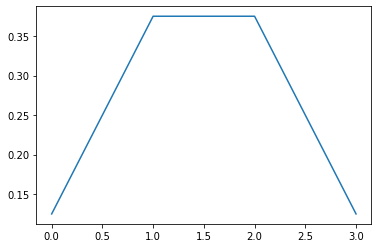

In [0]:
plt.plot(st.binom.pmf(x,n,p))

In [0]:
st.binom.pmf(10,30,0.5)

0.027981600724160505

In [0]:
p=0.3
n=3
x=2
st.binom.pmf(x,n,p)

0.18899999999999992

In [0]:
#1
p =0.3
x=5
n=7
1- (st.binom.cdf(4,7,0.3))

0.028795499999999974

In [0]:
st.binom.sf(4,7,0.3)

0.028795499999999998

In [0]:
# st.norm.sf
# st,norm.isf(x,mu,sd)
st.norm.ppf(0.05)

-1.6448536269514729

In [0]:
st.t.sf(2.5,63)

0.007517602155566203

In [0]:
st.norm.cdf(2.5)

0.9937903346742238

In [0]:
from google.colab import files
uploaded = files.upload()
import io
df= pd.read_csv(io.BytesIO(uploaded['cs1-1.csv']))
df.head()

Saving cs1-1.csv to cs1-1.csv


,id,age,gender,region,income,married,children,car,save_act,current_act,mortgage,pl
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 12 columns):
id             330 non-null object
age            330 non-null int64
gender         330 non-null object
region         330 non-null object
income         330 non-null float64
married        330 non-null object
children       330 non-null int64
car            330 non-null object
save_act       330 non-null object
current_act    330 non-null object
mortgage       330 non-null object
pl             330 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 31.1+ KB


In [0]:
df.describe()

,age,income,children
count,330.000000,330.000000,330.000000
mean,42.042424,27253.220758,1.051515
std,14.548463,13065.326534,1.066375
min,18.000000,5014.210000,0.000000
25%,29.250000,17149.675000,0.000000
50%,41.000000,24718.250000,1.000000
75%,54.000000,35523.750000,2.000000
max,67.000000,63130.100000,3.000000


In [0]:
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,levene,shapiro,chi2_contingency,f_oneway ,chisquare

In [0]:
from scipy.stats import mannwhitneyu,wilcoxon,kruskal

##two sample test

## check if there is significant income difference between genders

firstly we should test the assumptions ::
test the normality 
test the variance 
test the randomness 
## Since it is not following normal distribution we have to do a non-parameteric test


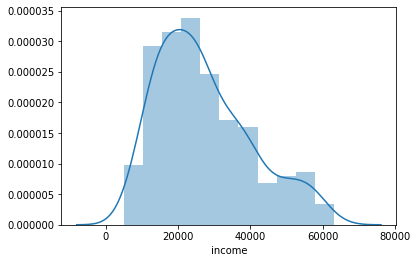

In [0]:
sns.distplot(df['income'])

## Test of Normality
#shapiro test 
##H0: var follows normal
##H1: var does not follow normal

In [0]:
#df['income'].skew()
shapiro(df['income'])
#O/P : statistics and p-value [critical-value approach and p-value approach]

(0.9428609013557434, 5.541547221099563e-10)

## Reject H0 as p-value is greater than alpha(0.05)

## Test of Variance

###HO: sigma2 male = sigma2 female
###H1:  sigma2 male not equal= sigma2 female

In [0]:
mi = df[df['gender']=='MALE']['income']

In [0]:
fi = df[df['gender']=='FEMALE']['income']

In [0]:
levene(mi,fi)

LeveneResult(statistic=0.004552939368501236, pvalue=0.9462442998451014)

## As p-value is greater than alpha H0 is accepted

## Test of Randomness . Lack of population data leads us to assume randomnes is there

In [0]:
ttest_ind(mi,fi)

Ttest_indResult(statistic=-0.2449534813001663, pvalue=0.8066456277315542)

### p-value is greater than alpha Accept H0. 
There is no significant difference between incomes of males and females

## Non-parameteric Test

In [0]:
mannwhitneyu(mi,fi)

MannwhitneyuResult(statistic=13394.0, pvalue=0.40623189504528334)

## as p-value is greater than alpha we should accept H0

## Test for Personal loan and income relation

In [0]:
ply = df[df['pl'] == 'YES']['income']
pln = df[df['pl'] == 'NO']['income']

## Test for variance

## Test for random 
## Test for normality


In [0]:
levene(ply,pln)

LeveneResult(statistic=12.304069050382678, pvalue=0.00051499743947121)

## p-value is less than alpha H0 reject

In [0]:
mannwhitneyu(ply,pln)

MannwhitneyuResult(statistic=9201.0, pvalue=3.7157568216019294e-07)

p_value is smaller than alpha, H0 reject
## There is no significant differnce 



## Proportion Test

In [0]:
from statsmodels.stats.proportion import proportions_ztest


(15.975241260567346, 1.9011737784759087e-57)

In [0]:
#Count of favourable outcomes and number of sample and popultion proprtion
proportions_ztest(200,500,0.05)

(15.975241260567346, 1.9011737784759087e-57)

## Two proportion Test 

In [0]:
# no of favourable outcomes in array and total values
proportions_ztest([200,150],[500,500])

(3.3149677206589807, 0.0009165370761145276)

### Is there any differnece in the proportion of pl taken by male and female

In [0]:
mpli = df[(df['pl'] =='YES') & (df['gender'] == 'MALE')].shape[0]
mpli

86

In [0]:
fpli = df[(df['pl'] =='YES') & (df['gender'] == 'FEMALE')].shape[0]
fpli

62

In [0]:
df[df['gender']=='MALE'].shape[0]

170

In [0]:
proportions_ztest([mpli,fpli],[len(df[df['gender']=='MALE']),len(df[df['gender']=='FEMALE'])])

(2.1610351850000873, 0.03069262159535531)

## Married vs pl

In [0]:
marpl = df[(df['pl'] =='YES') & (df['married'] == 'YES')].shape[0]
unmarpl = df[(df['pl'] =='YES') & (df['married'] == 'NO')].shape[0]
proportions_ztest([marpl,unmarpl],[len(df[df['married']=='YES']),len(df[df['married']=='NO'])])
 

(-2.544503091931482, 0.01094333429153045)

## Paired T test

In [0]:
Marks_before = [ 52, 56, 61, 47, 58, 52, 56, 60, 52, 46, 51, 62, 54, 50, 48, 59, 56, 51, 52, 44, 52, 45, 57, 60, 45]

Marks_after  = [62, 64, 40, 65, 76, 82, 53, 68, 77, 60, 69, 34, 69, 73, 67, 82, 62, 49, 44, 43, 77, 61, 67, 67, 54]

In [0]:
ttest_rel(Marks_before,Marks_after)

Ttest_relResult(statistic=-3.404831324883169, pvalue=0.0023297583680290364)

In [0]:
a = np.array(Marks_after)-np.array(Marks_before)

In [0]:
ttest_1samp(a,12)

-0.8690155264346161

In [0]:
0.0139>0.05

False